# Undersampling e Oversampling no Pandas

Desbalanceamento de dados é um problema muito comum nos conjuntos de dados. Duas possíveis soluções são a subamostragem (undersampling) aleatória e a superamostragem (oversampling) aleatória. O exemplo a seguir mostra um exemplo simples de como isso pode ser feito utilizando a biblioteca Pandas.

---

## Exploração inicial dos dados:

Criando conjunto de dados artificial, desbalanceado:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd341e132e8>,
      dtype=object)

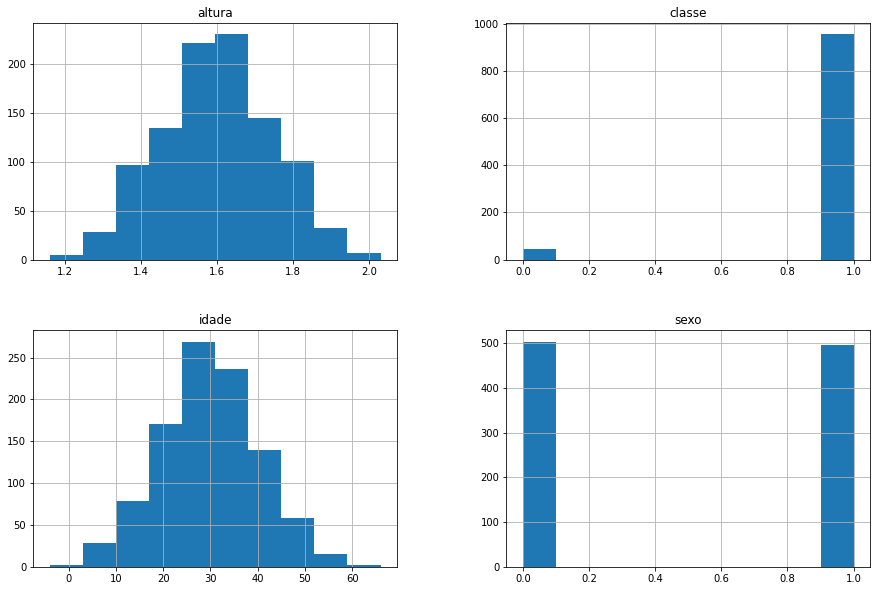

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Dados de exemplo
dados = pd.DataFrame({
    'idade': np.round(np.random.normal(loc=30, scale=10, size=1000)),
    'sexo': np.random.choice([0, 1], 1000), # 0 homem, 1 mulher
    'altura': np.round(np.random.normal(loc=1.6, scale=.15, size=1000), 2),
    'classe':  np.random.choice([0, 1], 1000, p=[0.05, 0.95])
    })

plt.rcParams['figure.figsize'] = [15, 10]
dados.hist()

Nota-se um grande desbalanceamento das classes através do histograma da variável alvo `classe`

In [0]:
dados['classe'].value_counts()

1    955
0     45
Name: classe, dtype: int64

A função `value_counts()` confirma o desbalanceamento: há **955** ocorrências da classe 1 e apenas **45** da classe 0.

---

## Superamostragem - Oversampling

Na superamostragem vamos aumentar o número de elementos da classe menos representada.

Primeiro vamos separar as tuplas do nosso conjunto de dados em que a classe é igual à 0:

In [0]:
classe_0 = dados[dados.classe == 0]
classe_0

,idade,sexo,altura,classe
11,34.0,0,1.65,0
23,30.0,0,1.27,0
72,33.0,0,1.75,0
78,32.0,0,1.52,0
80,18.0,0,1.46,0
84,31.0,1,1.80,0
86,18.0,0,1.56,0
120,29.0,1,1.61,0
130,20.0,1,1.60,0
138,39.0,0,1.40,0


In [0]:
classe_0.shape

(45, 4)

Agora vamos obter uma amostra de tamanho **955**, para que as classes fiquem igualmente distribuídas. Note que `replace` deve ser true, pois sem repetições não conseguiriamos criar uma amostra da classe `0` maior que **45**:

In [0]:
sample_0 = classe_0.sample(n=955, replace=True)
sample_0

,idade,sexo,altura,classe
11,34.0,0,1.65,0
989,53.0,1,1.28,0
601,40.0,1,1.39,0
421,27.0,1,1.52,0
23,30.0,0,1.27,0
...,...,...,...,...
393,32.0,1,1.87,0
693,32.0,0,1.73,0
874,41.0,1,1.65,0
86,18.0,0,1.56,0


Agora vamos concatenar os dados da nossa amostra com os dados do conjunto original que possuiam classe igual à 1:

In [0]:
classe_1 = dados[dados.classe == 1]
dados_upsampled = pd.concat([sample_0, classe_1])
dados_upsampled

,idade,sexo,altura,classe
11,34.0,0,1.65,0
989,53.0,1,1.28,0
601,40.0,1,1.39,0
421,27.0,1,1.52,0
23,30.0,0,1.27,0
...,...,...,...,...
995,37.0,1,1.60,1
996,34.0,0,1.51,1
997,25.0,1,1.43,1
998,30.0,0,1.46,1


Checando a distribuição das classes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd34217ee48>]],
      dtype=object)

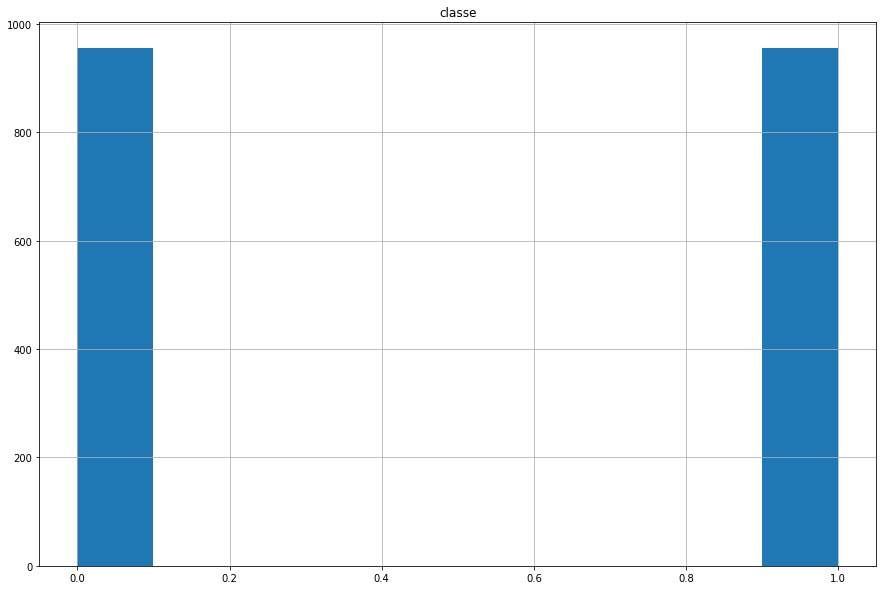

In [0]:
dados_upsampled.hist('classe')

In [0]:
dados_upsampled['classe'].value_counts()

1    955
0    955
Name: classe, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd341ac1630>,
      dtype=object)

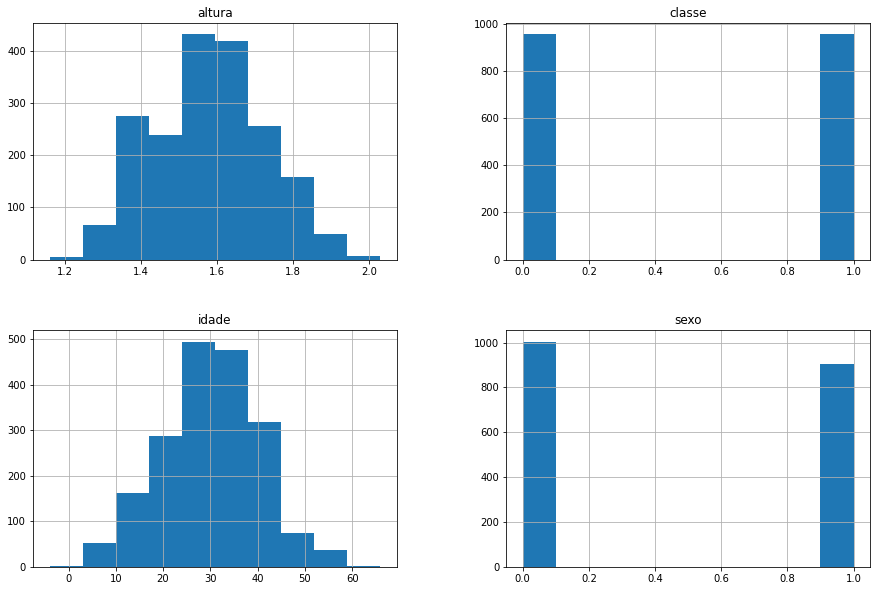

In [0]:
dados_upsampled.hist()



---

## Subamostragem - Undersampling

Para a subamostragem, vamos diminuir o tamanho da classe predominante.

Checando a distribuição das classes nos dados originais:

In [0]:
dados['classe'].value_counts()

1    955
0     45
Name: classe, dtype: int64

Selecionando as tuplas em que a classe é igual à 1:

In [0]:
classe_1 = dados[dados.classe == 1]
classe_1

,idade,sexo,altura,classe
0,31.0,0,1.54,1
1,26.0,1,1.69,1
2,31.0,0,1.33,1
3,23.0,1,1.64,1
4,36.0,0,1.71,1
...,...,...,...,...
995,37.0,1,1.60,1
996,34.0,0,1.51,1
997,25.0,1,1.43,1
998,30.0,0,1.46,1


Obtendo uma amostra de tamanho **45**. Note que, nesse caso, é interessante que nossa amostra possua elementos distintos, por isso `replace=False`:

In [0]:
sample_1 = classe_1.sample(n=45, replace=False)
sample_1

,idade,sexo,altura,classe
184,28.0,1,1.68,1
780,15.0,1,1.79,1
228,19.0,0,1.60,1
139,30.0,1,1.94,1
40,31.0,0,1.84,1
932,28.0,0,1.70,1
129,31.0,1,1.69,1
856,45.0,1,1.65,1
684,20.0,0,1.65,1
553,40.0,0,1.67,1


In [0]:
sample_1.shape

(45, 4)

Agora iremos concatenar a amostra com dados com os dados do conjunto original que possuiam classe igual a `0`:

In [0]:
classe_0 = dados[dados.classe == 0]
dados_downsampled = pd.concat([classe_0, sample_1])

Verificando a distribuição das classes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd341b84748>]],
      dtype=object)

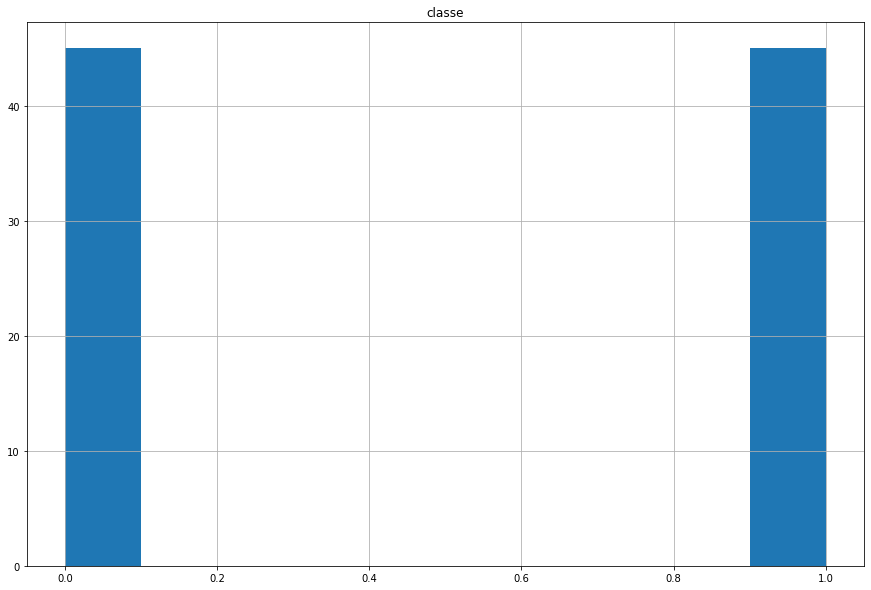

In [0]:
dados_downsampled.hist('classe')

In [0]:
dados_downsampled['classe'].value_counts()

1    45
0    45
Name: classe, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd34188fac8>,
      dtype=object)

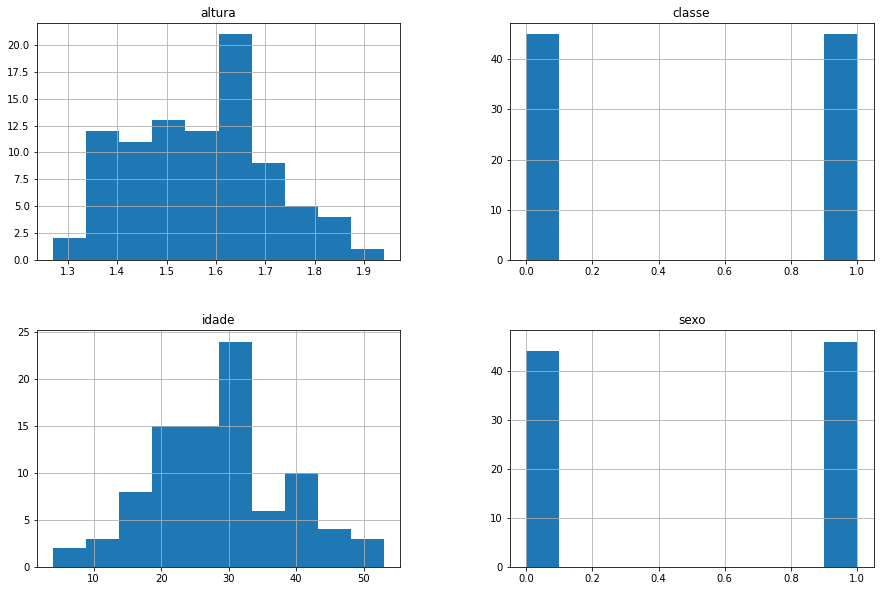

In [0]:
dados_downsampled.hist()



---

## Métricas de desempenho em conjuntos desbalanceados

Alguns cuidados são necessários ao medir desempenho em dados não balanceados. Por exemplo, suponha um classificador binário (`Some_classifier`) que sempre classifica uma entrada como a classe predominante do conjunto. Vamos calcular sua acurácia no conjunto de dados inicial:

In [0]:
import numpy as np

# Criando uma classe de classificador de exemplo
class Some_classifier:
  def __init__(self):
    self.predict_value = None
  def fit(self, X, y):
    self.predict_value = y.mode()
  def predict(self, X):
    return np.repeat(1, X.shape[0])

Separando em variáveis de entrada (`X`) e variáveis alvo (`y`) e calculando acurácia padrão:

In [0]:
from sklearn.metrics import accuracy_score

# Separando o conjunto de dados
X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

my_classifier = Some_classifier()
my_classifier.fit(X, y)
y_pred = my_classifier.predict(X)

print("Acurácia do classificador: %.2f%%" % (accuracy_score(y, y_pred)*100))

Acurácia do classificador: 95.50%


A medida de acurácia não representa muito bem o desempenho do nosso classificador. Existem métricas melhores:

In [0]:
from sklearn.metrics import balanced_accuracy_score

print("Acurácia balanceada do classificador: %.2f%%" % (balanced_accuracy_score(y, y_pred)*100))

Acurácia balanceada do classificador: 50.00%


In [0]:
print("Acurácia balanceada (ajustada para caso aleatório) do classificador: %.2f%%" % (balanced_accuracy_score(y, y_pred, adjusted=True)*100))

Acurácia balanceada (ajustada para caso aleatório) do classificador: 0.00%


In [0]:
from sklearn.metrics import precision_score

print("Precisão média-macro do classificador: %.2f%%" % (precision_score(y, y_pred,labels=[0, 1], average='macro', zero_division=0)*100))

Precisão média-macro do classificador: 47.75%


Material que discute bem diferentes métricas para dados desbalanceados: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/